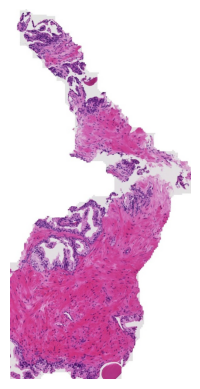

15


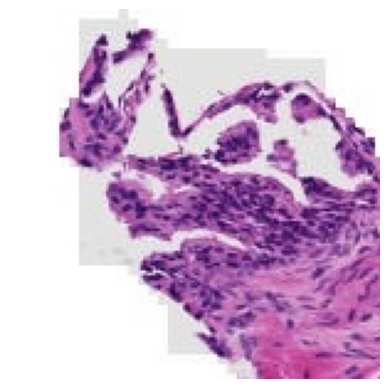

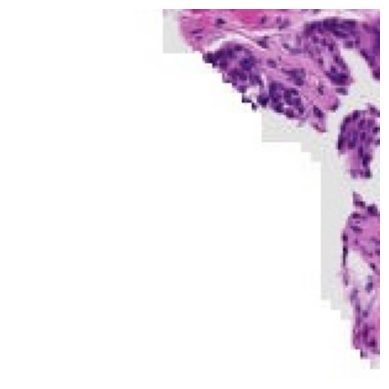

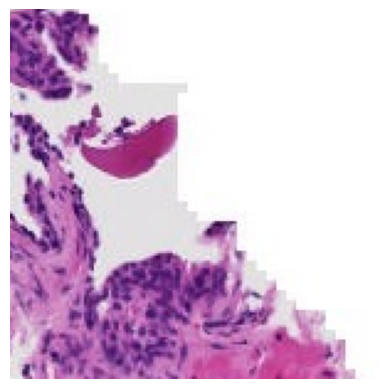

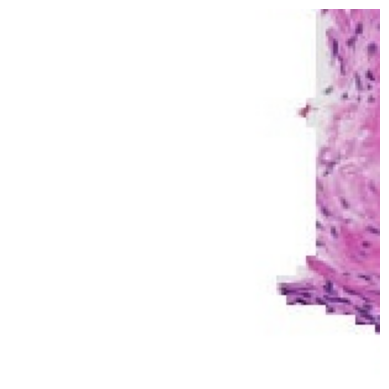

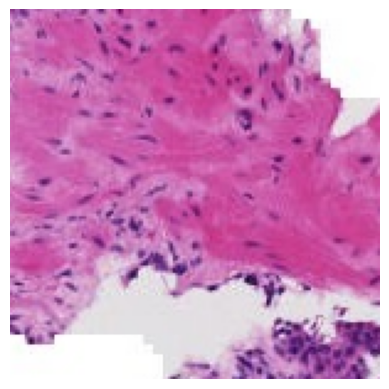

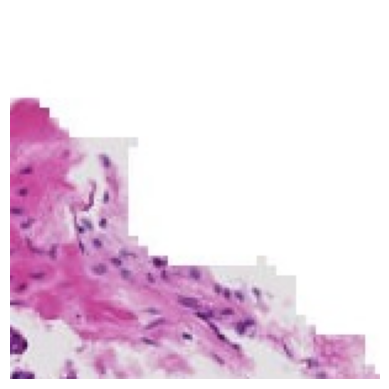

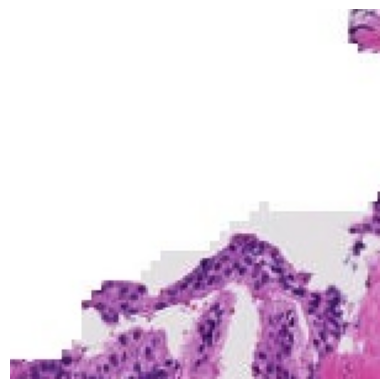

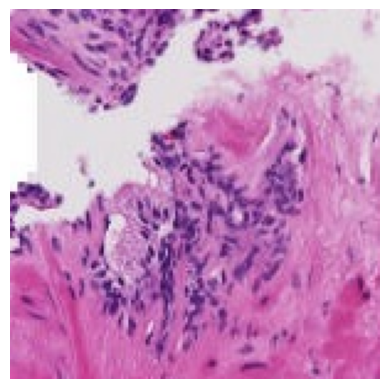

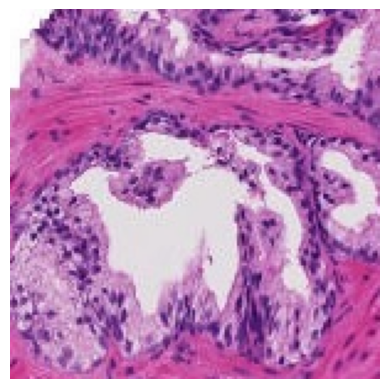

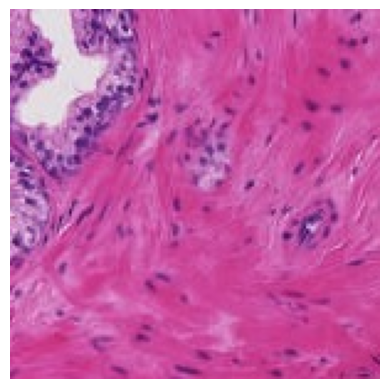

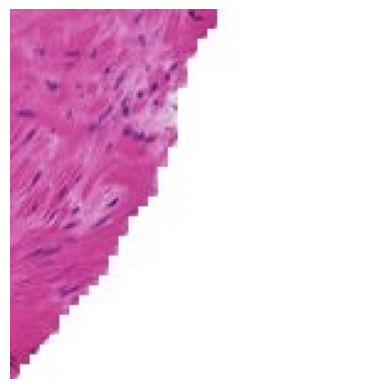

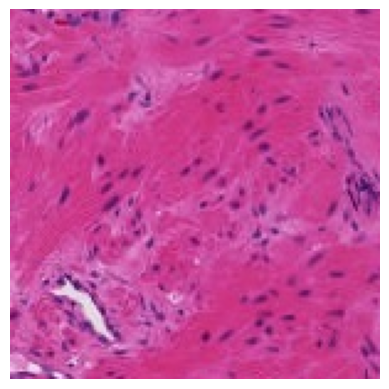

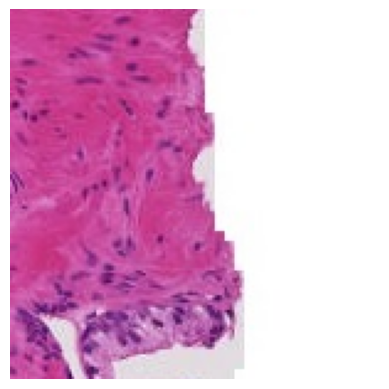

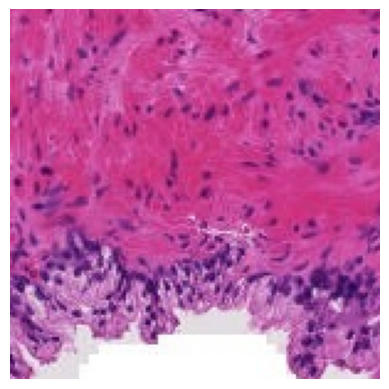

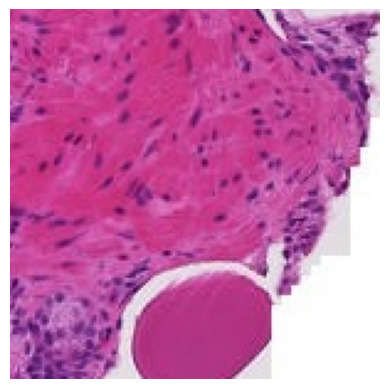

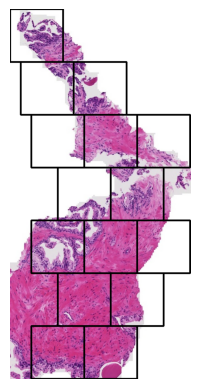

In [65]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

def sliding_windows(image, win_size, win_step):
    '''
    Выделяет скользящие окна из матрицы

    :param image: входное изображение
    :param win_size: размер окна
    :param win_step: шаг, с которым будет перемещаться окно по оси x
    :return: список из подматриц исходной матрицы, которые получились путем прохода окна
    '''
    windows = list()
    h, w, _ = image.shape

    for y in range(0, h - win_size + 1, win_size):
        for x in range(0, w - win_size + 1, win_step):
            win = image[y: y + win_size, x: x + win_size]
            windows.append((x, y,win))

    return windows

def is_correct_cell(cell_image):
    '''
    Определяет стоит ли заносить данную ячейку в список тех, что нужно оставить

    :param сell_image: элемент списка скользящих окон
    :return: True если threshold часть ячейки заполнена раковыми образованиями, иначе - false
    '''
    threshold = 0.2 #если такая часть ячейки заполнена раковой опухолью, то запоминаем ее

    total_pixels = cell_image.size

    non_white_sum = np.sum(cell_image < 255) #Считаем все не белые пиксели, если их больше чем threshold*total_pixels, то True

    return non_white_sum > (total_pixels * threshold)
    

def get_cancer_cells(image, cell_size, cell_number):
    '''
    Определяет ячейки в которых содержится больше всего информации о раковых образованиях

    :param image: фото раковых клеток
    :param cell_size: размер ячейки
    :param cell_number: количество ячеек
    :return: список из cell_number ячеек, которые содержат больше всего информации о раковых образованиях
    '''
    suitable_cells = list()

    n = 10

    cell_step = cell_size // n # вместо 10 можно вписать другое число
    cells_list = sliding_windows(image, cell_size, cell_step)

    i = 0
    while i != len(cells_list):  
        x, y, cell = cells_list[i]      
        if(is_correct_cell(cell)):
            suitable_cells.append((x, y, cell))            
            i += n
        else:
            i += 1

    return suitable_cells


    

matrix = np.array([[1, 2, 3, 4, 5, 6],
                    [7, 8, 9, 10, 11, 12],
                    [13, 14, 15, 16, 17, 18],
                    [19, 20, 21, 22, 23, 24],
                    [25, 26, 27, 28, 29, 30],
                    [31, 32, 33, 34, 35, 36]])

image = cv2.imread('cells/test_train0_1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()


res = get_cancer_cells(image, 150, 10)

print(len(res))

for i in range(len(res)):
    plt.imshow(res[i][2], cmap = 'gray')
    plt.axis('off')
    plt.show()

for x, y, cell in res:
    cv2.rectangle(image, (x, y), (x + 150, y + 150), (0, 0, 0), 3)

plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

